In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('results_func_comp.csv')
data['bias_squared'] = data['bias'] ** 2
data.head()

,Function,test_id,bias,variance,mse,bias_squared
0,func_poly_deg1,1,-0.092085,0.015467,0.023946,0.008480
1,func_poly_deg1,2,-0.068239,0.009279,0.013935,0.004657
2,func_poly_deg1,3,-0.049798,0.009505,0.011985,0.002480
3,func_poly_deg1,4,-0.105391,0.033955,0.045062,0.011107
4,func_poly_deg1,5,-0.075556,0.007495,0.013203,0.005709


In [29]:
data.groupby('Function')[['bias', 'variance', 'bias_squared', 'mse']].mean().reset_index()

,Function,bias,variance,bias_squared,mse
0,func_poly_deg1,-0.063829,0.013534,0.004582,0.018116
1,func_poly_deg2,-0.087457,0.080824,0.020818,0.101643
2,func_poly_deg3,-0.159294,1.165726,0.327240,1.492966
3,func_poly_deg4,-1.116372,27.686295,18.963130,46.649425


In [30]:
# pivot longer
data_melt = data.melt(id_vars=['Function', 'test_id'],
                      value_vars=['bias_squared', 'variance', 'mse'],
                      var_name='statistic',
                      value_name='value')
data_melt.head()

,Function,test_id,statistic,value
0,func_poly_deg1,1,bias_squared,0.008480
1,func_poly_deg1,2,bias_squared,0.004657
2,func_poly_deg1,3,bias_squared,0.002480
3,func_poly_deg1,4,bias_squared,0.011107
4,func_poly_deg1,5,bias_squared,0.005709


In [31]:
data_melt['func_name'] = data_melt['Function'].str.split('_deg').str[0]
data_melt['degree'] = data_melt['Function'].str.split('_deg').str[1].astype(int)
data_melt.head()

,Function,test_id,statistic,value,func_name,degree
0,func_poly_deg1,1,bias_squared,0.008480,func_poly,1
1,func_poly_deg1,2,bias_squared,0.004657,func_poly,1
2,func_poly_deg1,3,bias_squared,0.002480,func_poly,1
3,func_poly_deg1,4,bias_squared,0.011107,func_poly,1
4,func_poly_deg1,5,bias_squared,0.005709,func_poly,1


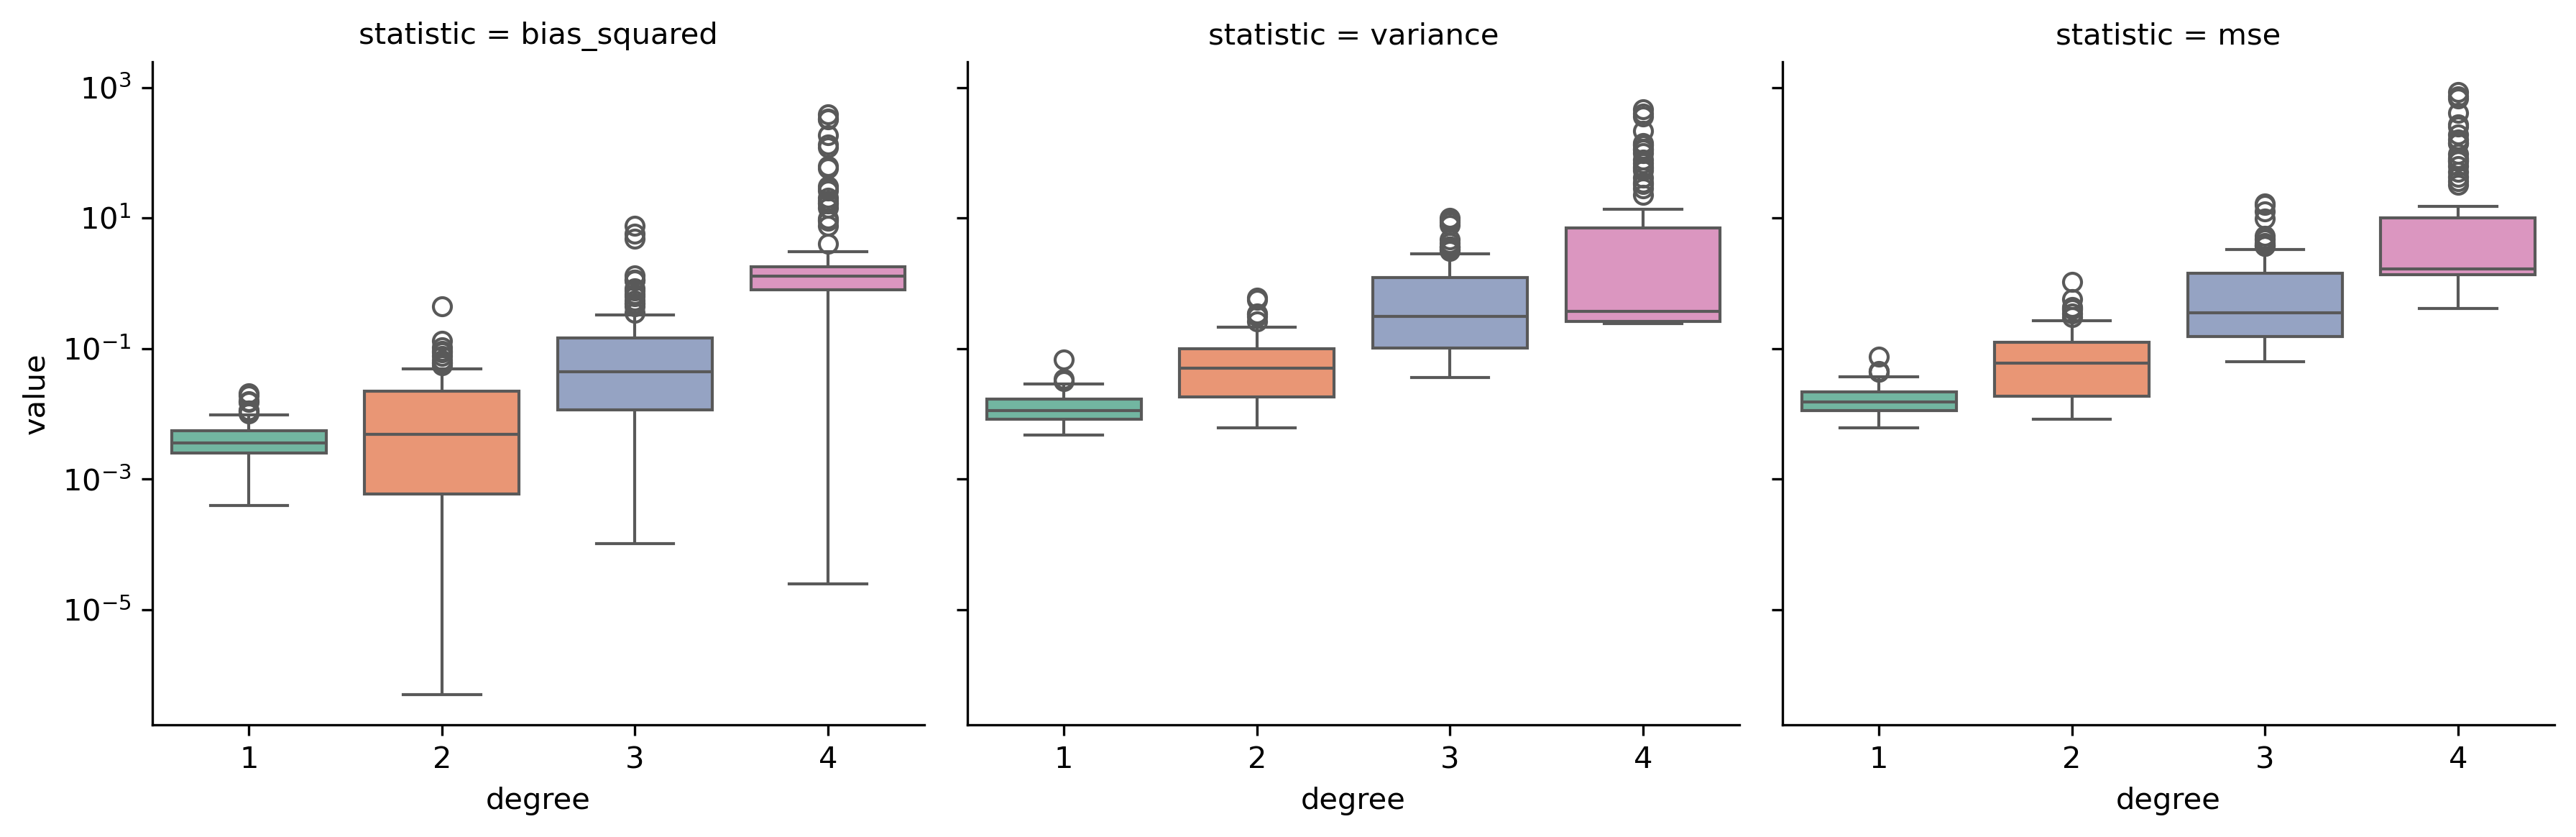

In [33]:
g = sns.FacetGrid(data_melt, col='statistic', col_wrap=3, height=4)
g.map_dataframe(sns.boxplot, x='degree', y='value', hue='degree', palette='Set2')
# log scale y-axis
g.set(yscale='log')
g.fig.dpi = 300